# Simulación de Sistemas: Circuito RLC Serie
### Análisis de Señales y Sistemas de Comunicación

---

| **Información del Proyecto** | **Detalles** |
| :--- | :--- |
| **Institución** | Instituto Tecnólogico Superior de Salvatierra. |
| **Carrera** | Ingeniería en TICS. |
| **Materia** | Análisis de Señales y Sistemas de Comunicación. |
| **Docente** | Francisco Javier Montecillo Puente |
| **Alumno** | **Jesús López Silva** |
| **Matrícula** | TI23110192 |
| **Fecha** | 11 de Diciembre de 2025 |

---

## Descripción de la Actividad

Este cuaderno interactivo implementa la simulación computacional de un **Circuito RLC en Serie**, analizado como un sistema lineal de segundo orden. 

El objetivo principal es conectar la teoría matemática (Ecuaciones Diferenciales y Transformada de Laplace) con la práctica, visualizando cómo reacciona el voltaje en el capacitor ante diferentes estímulos y valores de componentes comerciales.

### Objetivos del Análisis
El código presentado a continuación utiliza las librerías `Scipy`, `Numpy` y `Matplotlib` para resolver:

1.  **Función de Transferencia:** $$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$
2.  **Respuesta Temporal:** Visualización de oscilaciones, tiempos de subida y estabilidad.
3.  **Respuesta en Frecuencia (Bode):** Análisis de Magnitud (Espectro) y Fase.

### Casos de Estudio
Se analizarán **5 casos prácticos** variando $R$, $L$ y $C$:
* **Caso 1:** Sistema Subamortiguado (Oscilatorio).
* **Caso 2:** Sistema Sobreamortiguado (Estable y lento).
* **Caso 3:** Fenómeno de Resonancia.
* **Caso 4:** Comportamiento como Filtro Pasa-Bajas.
* **Caso 5:** Efecto de la variación de Capacitancia.

---
*> **Nota:** Ejecute la celda de código inferior para generar las gráficas de los 5 casos automáticamente.*

--- Generando Gráficas para CASO 1: Subamortiguado (R baja) ---


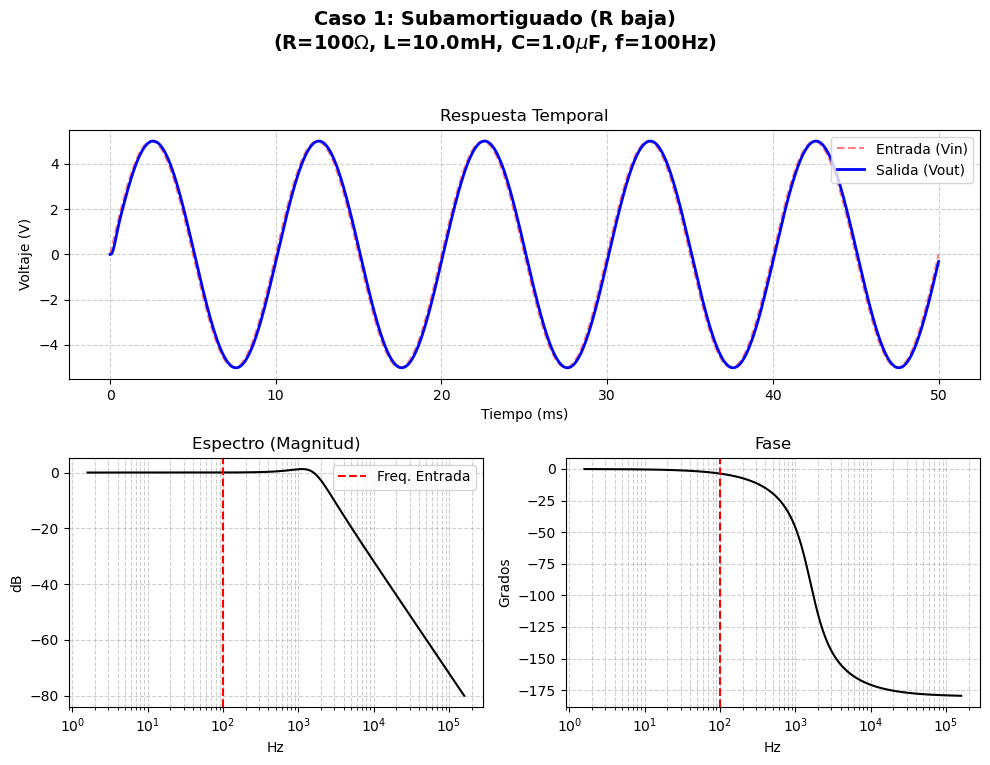

--- Generando Gráficas para CASO 2: Sobreamortiguado (R alta) ---


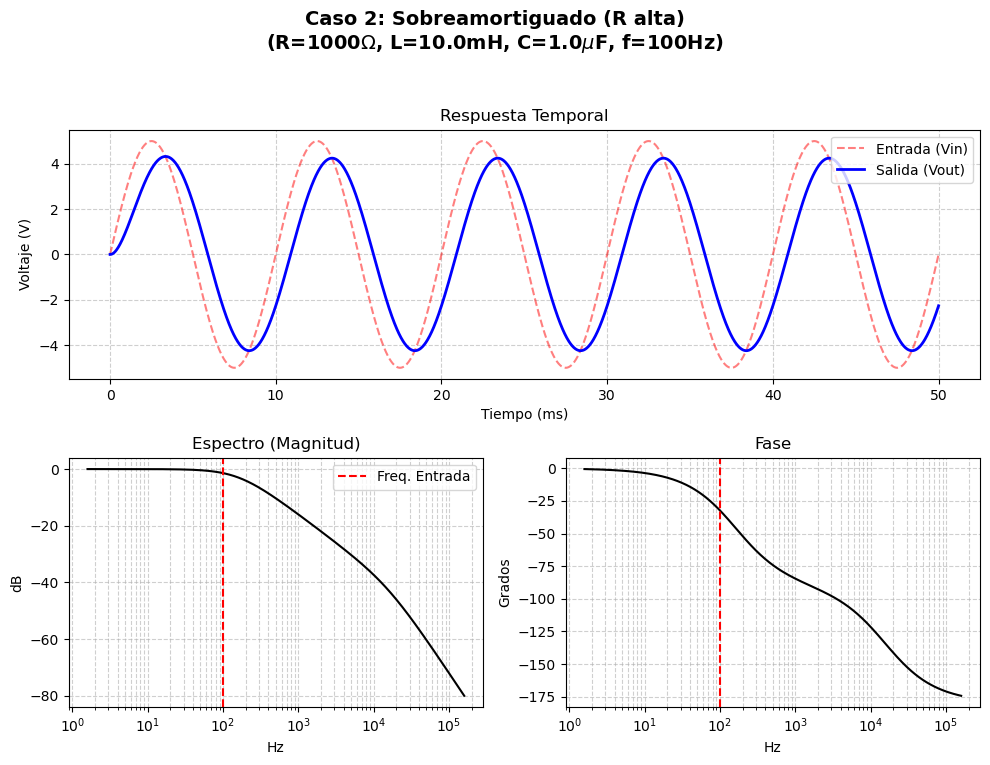

--- Generando Gráficas para CASO 3: Resonancia (f = f_natural) ---


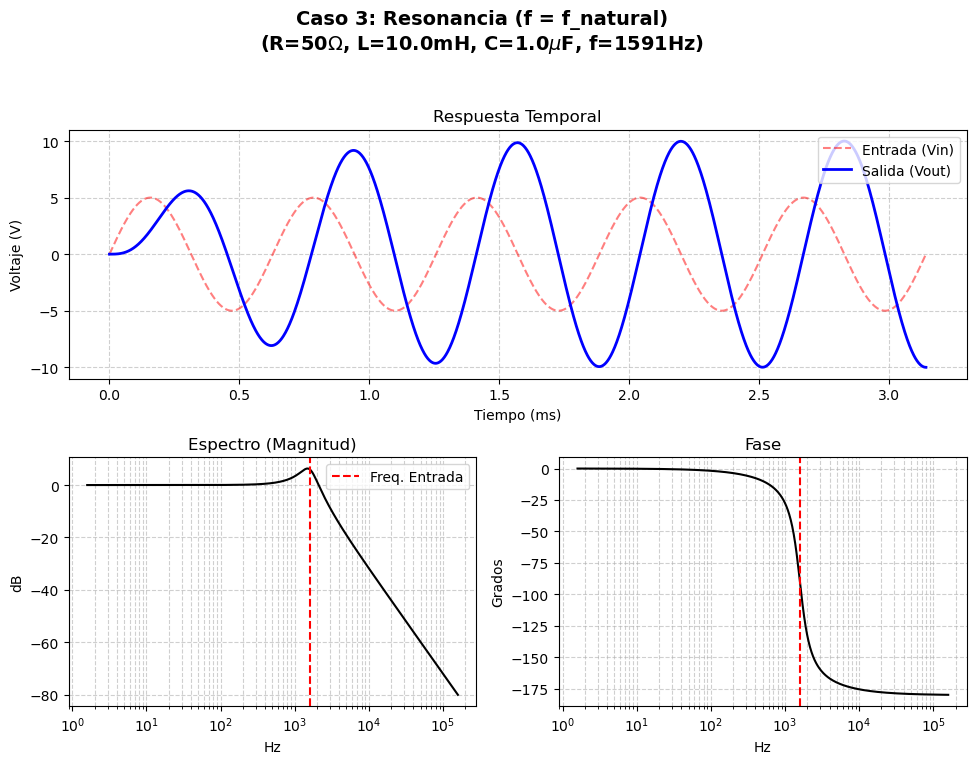

--- Generando Gráficas para CASO 4: Filtro Pasa Bajas (f alta) ---


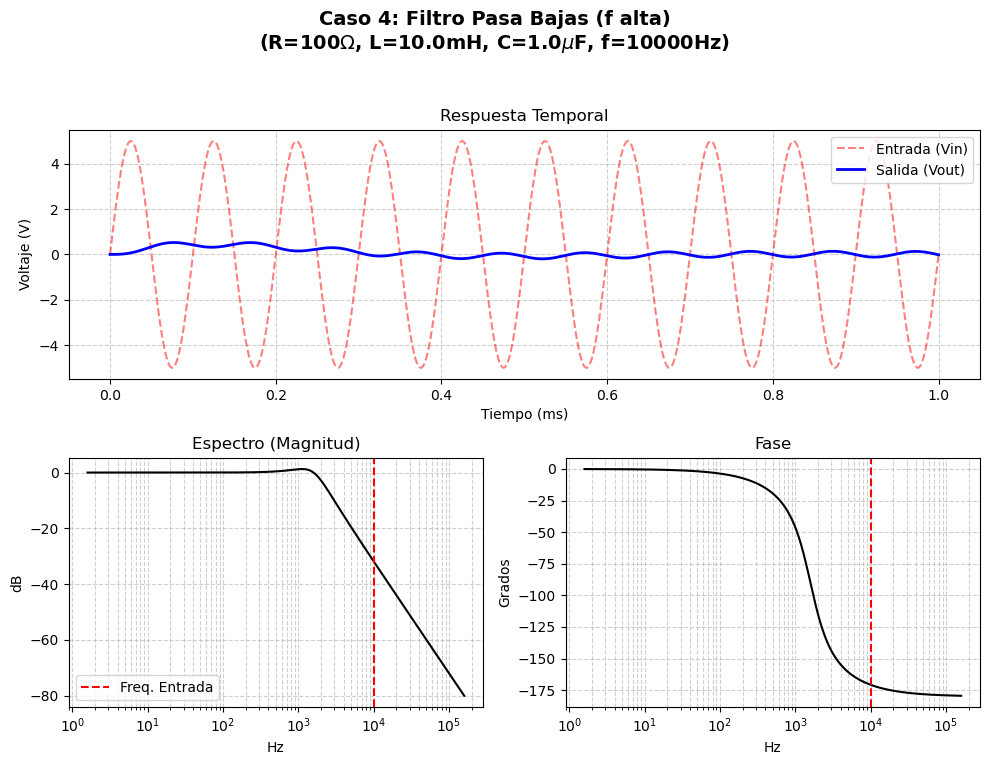

--- Generando Gráficas para CASO 5: Mayor Capacitancia (C=10uF) ---


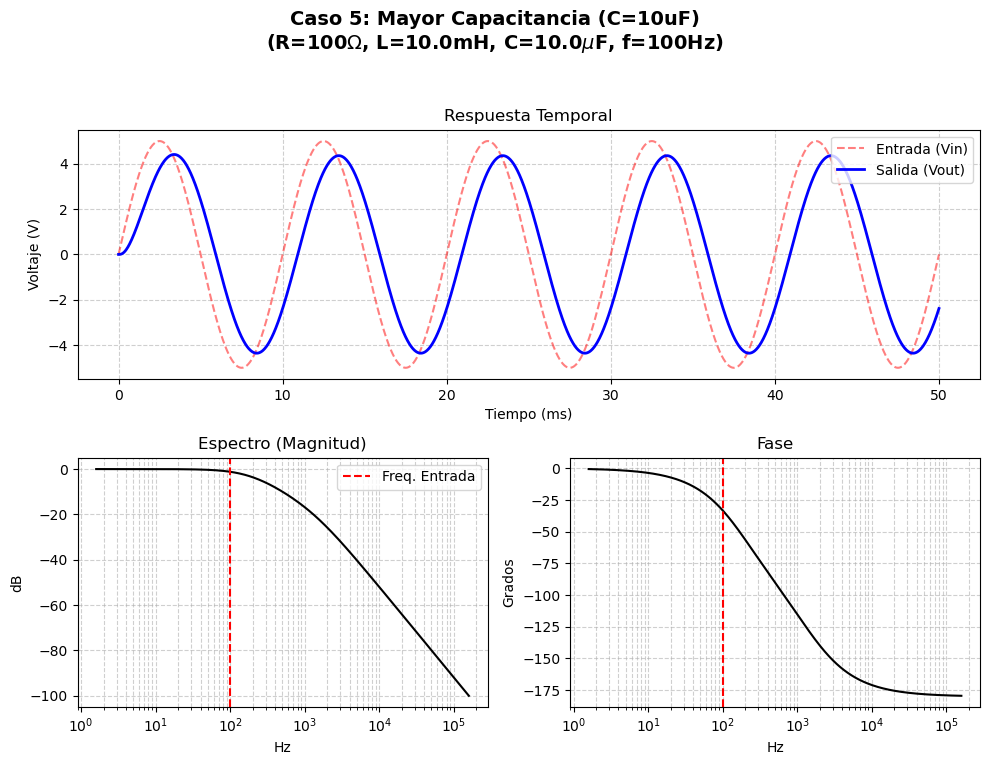

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# FUNCIÓN DE SIMULACIÓN 
def simular_caso(numero_caso, titulo_desc, R, L, C, V_amp, f, fase=0):
    print(f"--- Generando Gráficas para CASO {numero_caso}: {titulo_desc} ---")
    
    # 1. Definición del Sistema
    wn2 = 1 / (L * C)
    num = [wn2]
    den = [1, R/L, wn2]
    sistema = signal.TransferFunction(num, den)

    # 2. Simulación en el tiempo
    periodo = 1/f
    ciclos = 5 # Si es muy lenta 
    if f > 5000: ciclos = 10 # Para apreciarlas si es rápida 
        
    t = np.linspace(0, ciclos * periodo, 2000) 
    u = V_amp * np.sin(2 * np.pi * f * t + fase)
    t_out, y_out, x_out = signal.lsim(sistema, U=u, T=t)

    # 3. Respuesta en frecuencia
    w_bode, mag, phase = signal.bode(sistema, w=np.logspace(1, 6, 500))
    f_bode = w_bode / (2 * np.pi)

    #  ---------------------- GRAFICACIÓN ----------------------
    plt.figure(figsize=(10, 8))
    titulo_completo = f"Caso {numero_caso}: {titulo_desc}\n(R={R}$\\Omega$, L={L*1000:.1f}mH, C={C*1e6:.1f}$\\mu$F, f={f}Hz)"
    plt.suptitle(titulo_completo, fontsize=14, fontweight='bold')

    # Gráfica en el tiempo
    plt.subplot(2, 2, (1, 2))
    plt.plot(t * 1000, u, 'r--', label='Entrada (Vin)', alpha=0.5)
    plt.plot(t * 1000, y_out, 'b', label='Salida (Vout)', linewidth=2)
    plt.title('Respuesta Temporal')
    plt.ylabel('Voltaje (V)')
    plt.xlabel('Tiempo (ms)')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)

    # Magnitud
    plt.subplot(2, 2, 3)
    plt.semilogx(f_bode, mag, 'k')
    plt.title('Espectro (Magnitud)')
    plt.ylabel('dB')
    plt.xlabel('Hz')
    plt.axvline(x=f, color='r', linestyle='--', label='Freq. Entrada')
    plt.legend()
    plt.grid(True, which="both", linestyle='--', alpha=0.6)

    # Fase
    plt.subplot(2, 2, 4)
    plt.semilogx(f_bode, phase, 'k')
    plt.title('Fase')
    plt.ylabel('Grados')
    plt.xlabel('Hz')
    plt.axvline(x=f, color='r', linestyle='--')
    plt.grid(True, which="both", linestyle='--', alpha=0.6)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# -------------- CASOS --------------
# CASO 1: Subamortiguado (Oscilatorio)
simular_caso(
    numero_caso=1, 
    titulo_desc="Subamortiguado (R baja)",
    R=100, L=10e-3, C=1e-6, V_amp=5, f=100
)

# CASO 2: Sobreamortiguado (Lento)
simular_caso(
    numero_caso=2, 
    titulo_desc="Sobreamortiguado (R alta)",
    R=1000, L=10e-3, C=1e-6, V_amp=5, f=100
)

# CASO 3: Resonancia (Pico máximo)
# Nota: f = 1591 Hz es la frecuencia natural calculada
simular_caso(
    numero_caso=3, 
    titulo_desc="Resonancia (f = f_natural)",
    R=50, L=10e-3, C=1e-6, V_amp=5, f=1591
)

# CASO 4: Filtro Pasa Bajas (Alta frecuencia atenuada)
simular_caso(
    numero_caso=4, 
    titulo_desc="Filtro Pasa Bajas (f alta)",
    R=100, L=10e-3, C=1e-6, V_amp=5, f=10000
)

# CASO 5: Cambio de Componente (Mayor Capacitancia)
simular_caso(
    numero_caso=5, 
    titulo_desc="Mayor Capacitancia (C=10uF)",
    R=100, L=10e-3, C=10e-6, V_amp=5, f=100
)